In [1]:
from deep_translator import GoogleTranslator


ModuleNotFoundError: No module named 'deep_translator'

In [ ]:
!pip3 install streamlit
!pip3 install opencv-contrib-python


In [2]:
# pip install streamlit==1.24.0

In [1]:
import streamlit as st 
st.__version__

'1.36.0'

In [1]:
import streamlit

In [2]:
!pip3 install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 65.4 MB 22.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [4]:
from PIL import Image

my_logo = Image.open('LEGO_logo.svg.png')

In [3]:
%ls 

LEGO_logo.svg.png     app.py                pretrained/
app copy.py           explainers_logo2.png  temp.ipynb


In [ ]:
crop_damage_info = {
    'G': {
        'class_id': 'G',
        'class_name': 'Good Growth',
        'description': 'This indicates that the crop is growing well without any visible signs of stress, damage, or disease. The plants are healthy, with adequate water, nutrients, and sunlight.',
        'indicators': 'Uniform color, consistent growth patterns, and no signs of wilting or discoloration.',
        'management_tips': 'Continue with current agricultural practices, monitoring for any early signs of potential problems.'
    },
    'DR': {
        'class_id': 'DR',
        'class_name': 'Drought',
        'description': 'This class indicates that the crops are suffering from a lack of sufficient water. Drought stress can severely impact crop yield and quality.',
        'indicators': 'Wilting, yellowing of leaves, reduced growth rate, and in severe cases, leaf drop or plant death.',
        'management_tips': 'Implement irrigation strategies, mulch to conserve soil moisture, and consider drought-resistant crop varieties.'
    },
    'ND': {
        'class_id': 'ND',
        'class_name': 'Nutrient Deficient',
        'description': 'This indicates that the crops are lacking essential nutrients required for healthy growth. Nutrient deficiencies can affect various physiological processes in plants.',
        'indicators': 'Yellowing or discoloration of leaves, stunted growth, poor fruit or grain development, and specific patterns of deficiency (e.g., interveinal chlorosis for iron deficiency).',
        'management_tips': 'Conduct soil tests to identify lacking nutrients, apply appropriate fertilizers, and use soil amendments to improve nutrient availability.'
    },
    'WD': {
        'class_id': 'WD',
        'class_name': 'Weed',
        'description': 'This class indicates that the crops are being affected by weeds, which compete with crops for resources such as light, water, and nutrients.',
        'indicators': 'Presence of unwanted plants growing among crops, reduced growth of crops due to competition, and possible physical damage to crops from larger or more aggressive weed species.',
        'management_tips': 'Implement effective weed management practices, including mechanical removal, herbicides, and cover crops to suppress weed growth.'
    },
    'other': {
        'class_id': 'other',
        'class_name': 'Other',
        'description': 'This class includes various other types of damage that can affect crops, such as pests, diseases, or physical damage from wind.',
        'indicators': 'Pests: Chewed leaves, holes, visible insects or larvae, and signs of infestation like webbing or frass. Diseases: Spots on leaves, mold or mildew, wilting, and other pathogen-related symptoms. Wind Damage: Broken stems, bent plants, and physical damage caused by strong winds.',
        'management_tips': 'Pests: Use integrated pest management (IPM) strategies, including biological control, chemical pesticides, and cultural practices. Diseases: Apply fungicides or bactericides, use disease-resistant varieties, and practice crop rotation. Wind Damage: Implement windbreaks or shelterbelts, stake or support vulnerable plants, and choose resilient crop varieties.'
    }
}


In [1]:
# !pip3 install tensorflow
import tensorflow as tf 

: 

In [2]:
import tensorflow as tf

In [3]:
tf.__version__ 

'2.12.0'

In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import PIL as image_lib
import tensorflow as tf
# from keras.layers.core import Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

In [15]:
def create_model(height=180, width=180, channels=3, num_conv_layers=5, filters=32, kernel_size=3, dense_units=128, dropout_rate=0.08, n_dense_layer=1):
    inputs = Input(shape=(height, width, channels))
    inputs = inputs/255.0
    x = Conv2D(filters=filters, kernel_size=(kernel_size, kernel_size), activation='relu', padding='same') (inputs) 
    x = MaxPooling2D(pool_size=(2, 2))(x)
    for i in range(1, num_conv_layers):
        x = Conv2D(filters=filters*(i), kernel_size=(kernel_size, kernel_size), activation='relu', padding='same')(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        
    x = Flatten()(x)
    for layers in range(n_dense_layer):
        x = Dense(int(dense_units/(layers+1)), activation ='relu')(x)
        x = Dropout (dropout_rate)(x)

    outputs = Dense(5, activation='softmax')(x) 
    model   = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()

model.save_weights('temp.weights.h5')
model.load_weights('temp.weights.h5')

# model.load_weights('model.weights.h5')

In [16]:
path = "test_img1.jpg"
height, width = 180,180

1/1 [==============================] - 0s 115ms/step
Predicted class: Other (pest, disease or wind damage)


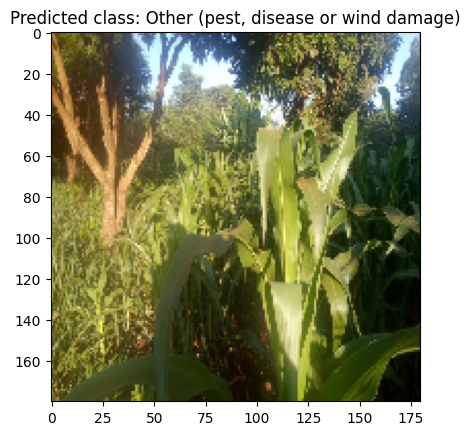

In [17]:
from tensorflow.keras.preprocessing import image
img = image.load_img(path, target_size=(height, width))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  
predictions = model.predict(img_array)
class_labels = {
    0: 'Good Growth (G)',
    1: 'Drought (DR)',
    2: 'Nutrient Deficient (ND)',
    3: 'Weed (WD)',
    4: 'Other (pest, disease or wind damage)'
}
predicted_class_index = np.argmax(predictions[0])
predicted_class_label = class_labels[predicted_class_index]
print(f"Predicted class: {predicted_class_label}")
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_label}")
plt.show()